<a href="https://colab.research.google.com/github/XplosionLoli/machine-learning-sem-3/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima
#!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# **Load Data**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Duzttt/ml/refs/heads/main/15-24.csv')
#df = df[df['Gred A'] != df['Gred A'].shift()]

In [ ]:
# Set the time column as the index and make sure it is in datetime format
# Parse the date column
df['Date'] = pd.to_datetime(df['Tarikh'], format='%d.%m.%Y')

# Set date as index
df.set_index('Date', inplace=True)

# Check if the data is in ascending order
df = df.sort_index()

#
df=df.drop(['Tarikh'],axis=1)

In [ ]:
print(df)

            Gred AA  Gred A  Gred B  Gred C  Gred D  Gred E
Date                                                       
2015-01-06     42.0      41      40      39    38.0    36.0
2015-01-07     42.0      41      40      39    38.0    36.0
2015-01-14     42.0      41      40      39    38.0    36.0
2015-01-21     42.0      41      40      39    38.0    36.0
2015-01-28     42.0      41      40      39    38.0    36.0
...             ...     ...     ...     ...     ...     ...
2024-09-30      NaN      47      44      42     NaN     NaN
2024-10-07      NaN      47      44      42     NaN     NaN
2024-10-14      NaN      46      44      42     NaN     NaN
2024-10-21      NaN      47      44      42     NaN     NaN
2024-10-28      NaN      46      44      42     NaN     NaN

[475 rows x 6 columns]


# **Data prepartion**

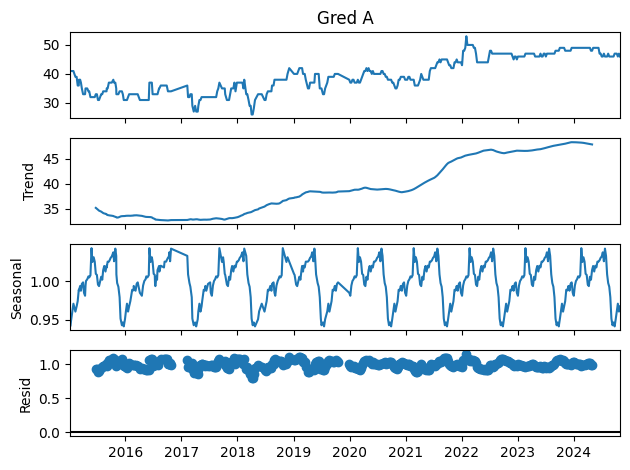

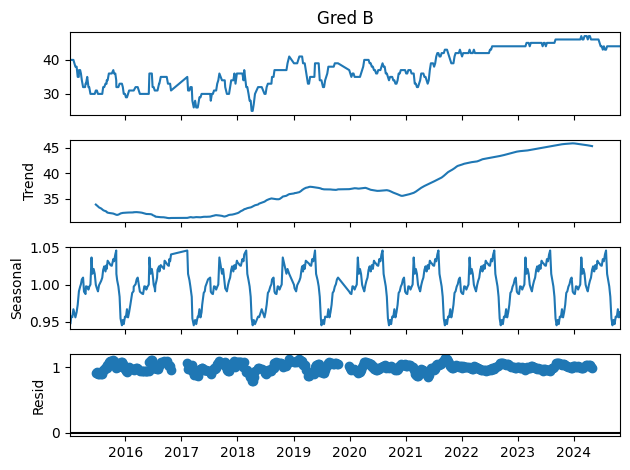

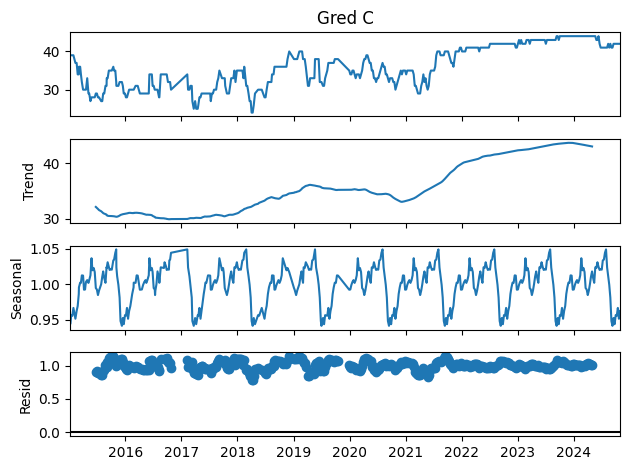

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Select a single column time series
yA = df['Gred A']
yB = df['Gred B']
yC = df['Gred C']

# ETS decompose
resultA = seasonal_decompose(yA, model='multiplicative', period=52)  # 每年52周
resultB = seasonal_decompose(yB, model='multiplicative', period=52)  # 每年52周
resultC = seasonal_decompose(yC, model='multiplicative', period=52)  # 每年52周

# plot result
resultA.plot()
resultB.plot()
resultC.plot()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1279.585, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1270.926, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1274.891, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1274.893, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1268.940, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1272.904, Time=0.12 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1272.905, Time=0.14 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1274.905, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1272.913, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1272.915, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1274.083, Time=0.37 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 3.370 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


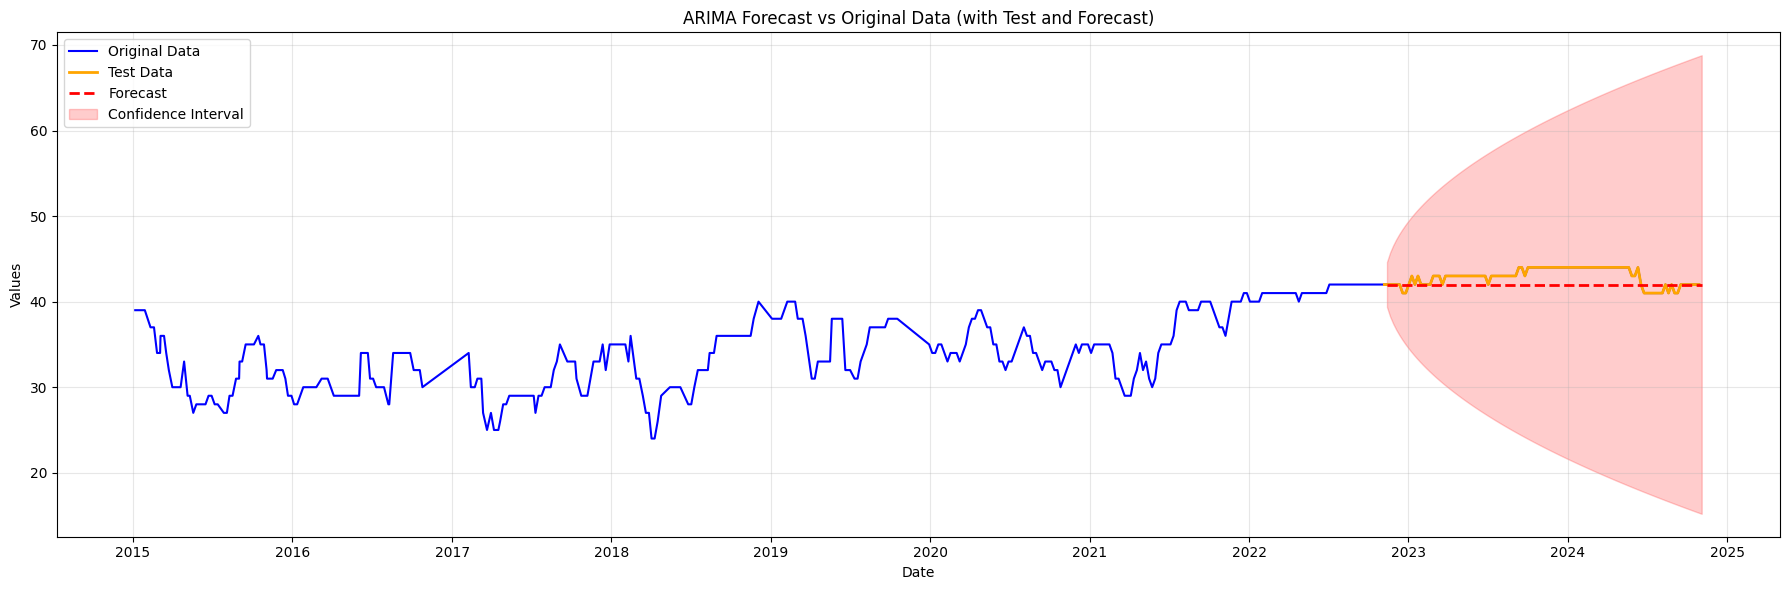

In [ ]:
# Split data into training and testing (e.g., last 104 weeks as test data)
train = C[:-104]
test = C[-104:]

# Fit the AutoARIMA model to the training data
model = pm.auto_arima(train, seasonal=True, m=12, trace=True, suppress_warnings=True)

# Print the summary of the fitted model
print(model.summary())

# Forecast future values (e.g., next 104 weeks)
n_periods = 104
forecast = model.predict(n_periods=n_periods)

# Generate forecast index
forecast_index = pd.date_range(start=test.index[0], periods=n_periods, freq='W')

# Plot the original time series and forecasted values
plt.figure(figsize=(18, 6))

# Plot original data
plt.plot(C, label='Original Data', color='blue')

# Highlight the test data
plt.plot(test.index, test, label='Test Data', color='orange', linewidth=2)

# Highlight the forecast with confidence intervals
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='dashed', linewidth=2)

# Add axis labels
plt.xlabel("Date")
plt.ylabel("Values")

# Add grid for better readability
plt.grid(alpha=0.3)

# Add confidence intervals (optional, if available)
confidence_intervals = model.predict(n_periods=n_periods, return_conf_int=True)[1]
plt.fill_between(forecast_index, confidence_intervals[:, 0], confidence_intervals[:, 1],
                  color='red', alpha=0.2, label='Confidence Interval')

# Add a title
plt.title("ARIMA Forecast vs Original Data (with Test and Forecast)")

# Move legend to avoid overlap
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"Root Mean Square Error (RMSE): {rmse}")#value x, y must same

Root Mean Square Error (RMSE): 1.3551894559575284


In [ ]:
import sklearn
sklearn.__version__

'1.6.0'